#Task 1: plan for the data
- First step will be discovery - find out name & types of columns, 
- I've assumed that the data is clean and doesn't require validation or handling of erroneous rows
- I've tried to extract meaningful information based on the column name and it's value space

For each task we'll take the original table and create a new table based on the criteria required so as to not corrupt our original data. 



In [2]:
"""
Initialisations
""" 
# Standard Library imports
from pathlib import Path 

# Thirds Party Libraries
import pandas as pd
from plotnine import ggplot, aes, geom_bar, geom_col

# Globals
file_name = "us_names_by_decade.csv"
data_directory = "data"
file_path = Path.cwd() / data_directory / file_name


In [ ]:
"""
Read in the data and do some basic analysis
"""

table = pd.read_csv(file_path)

columns = table.columns.values.tolist()
print(f"Columns: {columns}")

for column in columns:
    column_num = columns.index(column)
    print(f"Datatype of '{column}' column: ", type(table.iloc[:, column_num][column_num + 1])) 

genders = set(table[columns[0]].tolist())
names = set(table[columns[1]].tolist())
decades = set(table[columns[2]].tolist())
counts = table[columns[3]].tolist()

print(f"Genders: {genders}")
print(f"Decades: {decades}")
print(f"Unique names count: {len(names)}")
print(f"Max count: {max(counts)}, \nMin count: {min(counts)}")
print(f"Total data points (people in this case): {sum(counts)}")

Task 2:  I've chosen a grouped bar chart so it's easy to see the most popular names in each decade and also comparing each decade to one anopther.  

Admittedly the colors are not great as it's hard to distinguish the actual names.

Given time I would make an improvement here and have separate charts for each decade would be to have a separate chart with the top 5 names for each decade.  


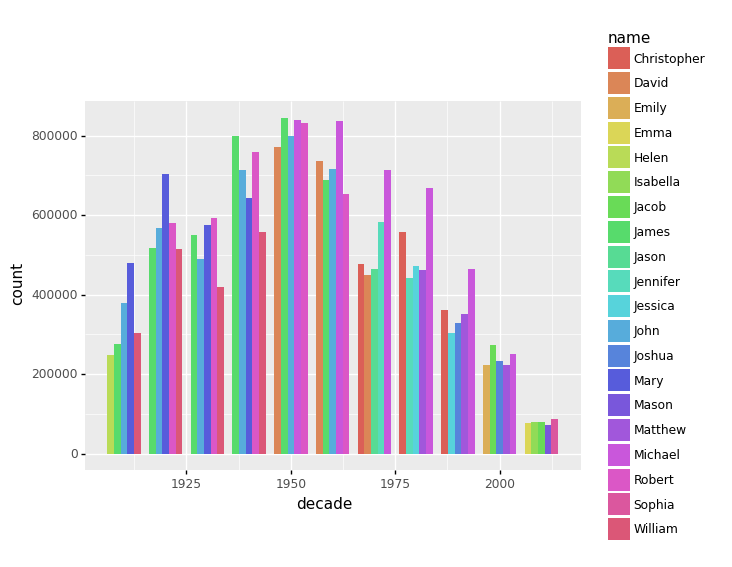

<ggplot: (134066703866)>

In [25]:
"""
Task 2: Top 5 names in each decade
"""

# As the dataset already contains a count of names we do sum to use the value & reset_index to get a dataframe back
name_count_by_decade = table.groupby(['decade', 'name']).sum().reset_index()
# Below I'm doing a sort by decade AND count, descending order, grouping by decade and then printing out the top 5 
top_five_names_per_decade = name_count_by_decade.sort_values(
    ['decade', 'count'], ascending=False
).groupby('decade').head(5).reset_index()

bar_width = 1.0
# print(name_count_by_decade)
(
    ggplot(top_five_names_per_decade)
    + aes(
        x="decade", 
        y="count", 
        fill="name",
    )
    + geom_col(
        position="dodge", 
        stat="identity",
        width=8.0,
        show_legend=True
    )
)

In [ ]:
"""
EXPERIMENT Task 2: Top 5 names in each decade
"""

# As the dataset already contains a count of names we do sum to use the value & reset_index to get a dataframe back
name_count_by_decade = table.groupby(['decade', 'name']).sum().reset_index()
# Below I'm doing a sort by decade AND count, descending order, grouping by decade and then printing out the top 5 
top_five_names_per_decade = name_count_by_decade.sort_values(
    ['decade', 'count'], ascending=False
).groupby('decade').head(5).reset_index()
for decade in decades: 
    top_names = top_five_names_per_decade[(top_five_names_per_decade["decade"] == decade)]
    plot = (
        ggplot(top_names)
        + aes(
            x="name", 
            y="count",
            label=f"Top names of {decade}"
        )
        + geom_col(
            position="dodge", 
            stat="identity",
            width=0.5,
            show_legend=True
        )
    )

In [28]:
"""
INCOMPLETE
Task 3: Plot a graph depicting the distribution of the Names that are Female in decade 1980.
"""
desired_decade = 1980
desired_gender = 'F'
female_1980_names = table[(table["decade"] == desired_decade) & (table["gender"] == desired_gender)]

print(female_1980_names)
    

      gender        name  decade   count
47735      F     Jessica    1980  469415
47737      F    Jennifer    1980  440818
47740      F      Amanda    1980  369679
47742      F      Ashley    1980  352122
47751      F       Sarah    1980  272522
...      ...         ...     ...     ...
60154      F     Tonette    1980       5
60155      F     Talesha    1980       5
60161      F  Jacqualine    1980       5
60162      F      Kaarin    1980       5
60164      F    Micheala    1980       5

[7408 rows x 4 columns]


Task 4:  chosen a bar chart here as it is easy to see by glance which decade had the most unique names but also how other decades compared with it.  

Decade with most names: 1950


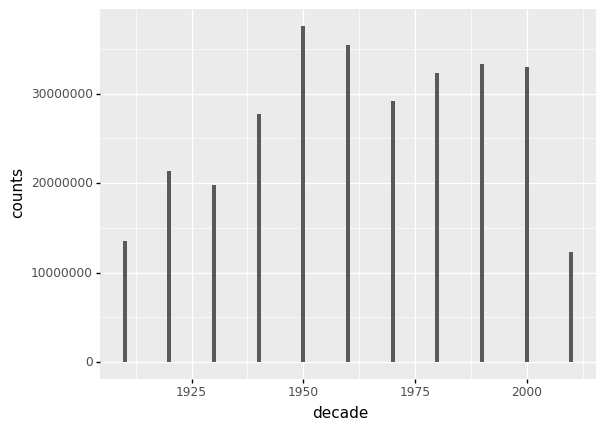

<ggplot: (138014609219)>

In [10]:
"""
Task 4: Decade with most names
"""
 
decades_name_counts = {sum(table.loc[table["decade"] == decade, "count"]): decade for decade in decades}
maximum_names = max(decades_name_counts.keys())
print(f"Decade with most names: {decades_name_counts.get(maximum_names)}")

name_count_per_decade = pd.DataFrame({"decade": decades_name_counts.values(), "counts": decades_name_counts.keys()})

(
    ggplot(table)
    + aes(x="decade", y="counts")
    + geom_bar(stat="identity")
)


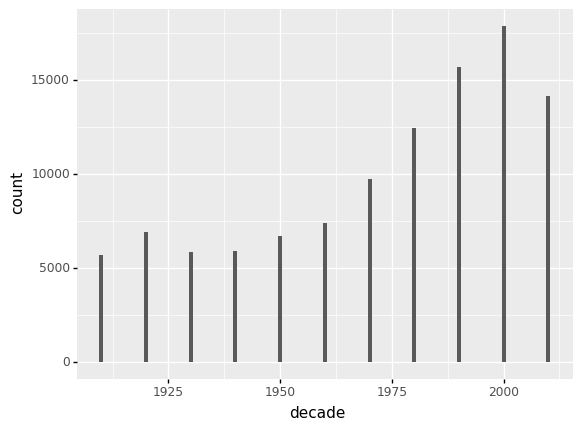

<ggplot: (138016950483)>

In [12]:
"""
INCOMPLETE
Task 5: Average number of names per decade
"""
(
    ggplot(table)
    + aes(x="decade")
    + geom_bar(stat="count")
)